In [375]:
import numpy as np
import time
import matplotlib.pyplot as plt

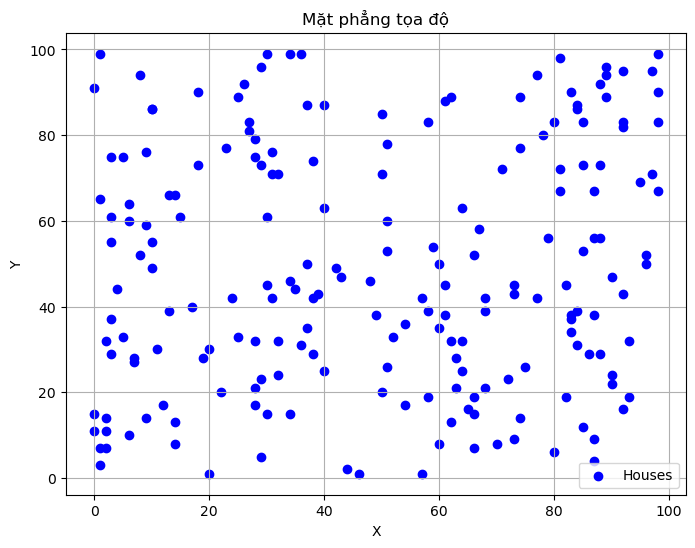

In [376]:
# Kích thước mặt phẳng
width = 100
height = 100

# Số lượng tọa độ cần khởi tạo
num_points = 200

# Sinh ngẫu nhiên tọa độ x và y trong phạm vi từ 0 đến width-1 và từ 0 đến height-1
x_coords = np.random.randint(0, width, num_points)
y_coords = np.random.randint(0, height, num_points)

# Tạo danh sách các tọa độ
coordinates = list(zip(x_coords, y_coords))

# Chuyển đổi danh sách tọa độ thành mảng numpy để dễ dàng truy cập
coordinates = np.array(coordinates)

# Vẽ mặt phẳng tọa độ
plt.figure(figsize=(8, 6))
plt.scatter(coordinates[:, 0], coordinates[:, 1], color='b', marker='o', label='Houses')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mặt phẳng tọa độ')
plt.grid(True)
plt.legend()
plt.show()


In [377]:
def plot_points_and_circles(coordinates, x, n):
    plt.figure(figsize=(8, 6))
    
    # Vẽ các điểm từ ma trận coordinates
    plt.scatter(coordinates[:, 0], coordinates[:, 1], color='b', marker='o', label='Houses')
    
    # Vẽ các điểm từ ma trận x
    plt.scatter(x[:, 0], x[:, 1], color='r', marker='x', label='Power stations')
    
    # Vẽ các đường tròn tâm x bán kính n
    for point in x:
        circle = plt.Circle(point, n, color='g', fill=False)
        plt.gcf().gca().add_artist(circle)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Mặt phẳng tọa độ')
    plt.grid(True)
    plt.legend()
    plt.show()

In [378]:
# khoang cach 
def length(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

# ham doi tuong
def obj(x, coordinates):
    count = 0
    for i in coordinates:
        for j in x:
            if length(i, j) < L:
                count += 1
                break
    return len(coordinates) - count

# Ackley
# def obj(x, coordinates):
#     x = x[0]
#     return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x[0]**2 + x[1]**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))) + np.e + 20

# Himmelblau
# def obj(x, coordinates):
#     x = x[0]
#     return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# mutation 
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])


# boundary check 
def check_bounds(mutated, bounds):
    return np.clip(mutated, bounds[0], bounds[1])



# crossover 
def crossover(mutated, target, cr):
    # ti le giu lai cua tung diem
    p = np.random.rand(*mutated.shape)
    trial = np.where(p < cr, mutated, target)
    return trial

In [379]:
def differential_evolution(pop_size, bounds, num, iter, F, cr):
    # tao quan the mot cach ngau nhien
    # pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    pop = np.random.uniform(low=bounds[0], high=bounds[1], size=(pop_size, num, 2))
    # tinh ham doi tuong cho toan bo quan the
    obj_all = [obj(ind, coordinates) for ind in pop]
    # tim vector tot nhat hien tai
    best_vector = pop[np.argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj
    print('Pop: f([%s]) = %.5f' % ( np.around(best_vector, decimals=3), best_obj))

    # luu tru cac ca the tot nhat moi quan the
    timeline = []
    timeline.append([0, np.copy(best_vector), np.copy(best_obj)])
    # vong lap thuat toan
    for i in range(iter):
        # duyet tung ca the
        for j in range(pop_size):
            # chon 3 ca the khac j
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[np.random.choice(candidates, 3, replace=False)]
            # mutation
            mutated = mutation([a, b, c], F)
            # check bounds
            mutated = check_bounds(mutated, bounds)
            # crossover
            trial = crossover(mutated, pop[j], cr)
            # tinh gia tri vector hien tai
            obj_target = obj(pop[j], coordinates)
            # tinh gia tri vector moi
            obj_trial = obj(trial, coordinates)
            # chon loc tu nhien
            if obj_trial < obj_target:
                # thay ca the moi
                pop[j] = trial
                # luu gia tri ca the moi
                obj_all[j] = obj_trial
        # tim best
        best_obj = min(obj_all)
        # neu gia tri tang thi in ket qua moi
        if best_obj < prev_obj:
            best_vector = pop[np.argmin(obj_all)]
            timeline.append([i,np.copy(best_vector), np.copy(best_obj)])
            prev_obj = best_obj
            print("---------------------------------------------------")
            print('Iteration: %d f([%s]) = %f' % (i, np.around(best_vector, decimals=3), best_obj))
    return timeline

In [380]:
# population size
pop_size = 10
# lower and upper bounds for every dimension
bounds = [0, 100]
# number of iterations
iter = 500
# scale factor for mutation
F = 0.5
# crossover rate for recombination
cr = 0.7
# khoang cach toi da
L = 20
# so co so
num = 5

In [381]:
start_time = time.time()

solution = differential_evolution(pop_size, bounds, num, iter, F, cr)

end_time = time.time()
execution_time = end_time - start_time

print('\nSolution: f([%s]) = %f' % (np.around(solution[-1][1], decimals=5), obj(solution[-1][1], coordinates)))
print("\n",execution_time)

Pop: f([[[70.315 60.657]
 [76.233 14.844]
 [21.156 68.85 ]
 [49.298 30.617]
 [10.772  5.536]]]) = 87.00000
---------------------------------------------------
Iteration: 7 f([[[54.947 28.399]
 [15.023 23.424]
 [88.368 39.671]
 [44.133 46.002]
 [ 3.405 73.252]]]) = 85.000000
---------------------------------------------------
Iteration: 24 f([[[59.984 12.267]
 [20.005 18.705]
 [81.112 59.745]
 [46.288 37.15 ]
 [16.232 82.816]]]) = 80.000000
---------------------------------------------------
Iteration: 38 f([[[76.782 28.399]
 [15.023 23.424]
 [46.704 35.471]
 [44.133 58.526]
 [20.495 73.252]]]) = 79.000000
---------------------------------------------------
Iteration: 46 f([[[94.236 80.482]
 [ 8.458 21.805]
 [49.819 56.935]
 [80.05  40.201]
 [21.189 68.319]]]) = 78.000000
---------------------------------------------------
Iteration: 51 f([[[84.28  85.03 ]
 [13.266 24.899]
 [67.124 32.178]
 [75.02  42.08 ]
 [19.259 77.285]]]) = 71.000000
-------------------------------------------------

In [382]:
# idex
print(len(solution))

18


In [383]:
# vong lap
print(solution[4][0])

46


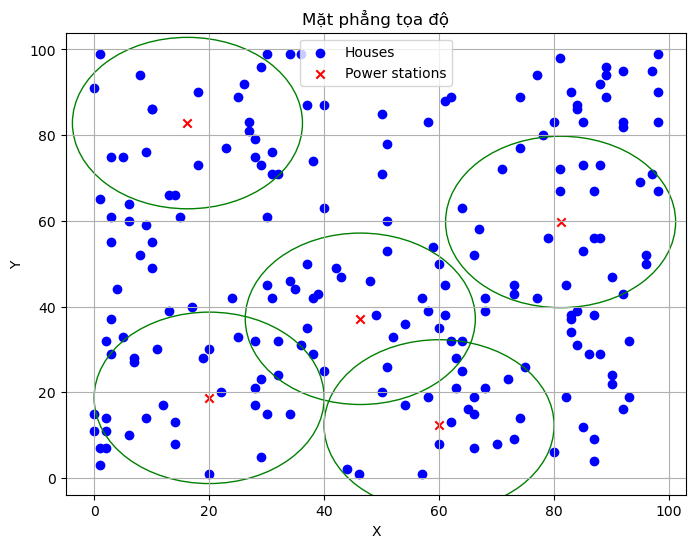

In [384]:
plot_points_and_circles(coordinates, solution[2][1], L)

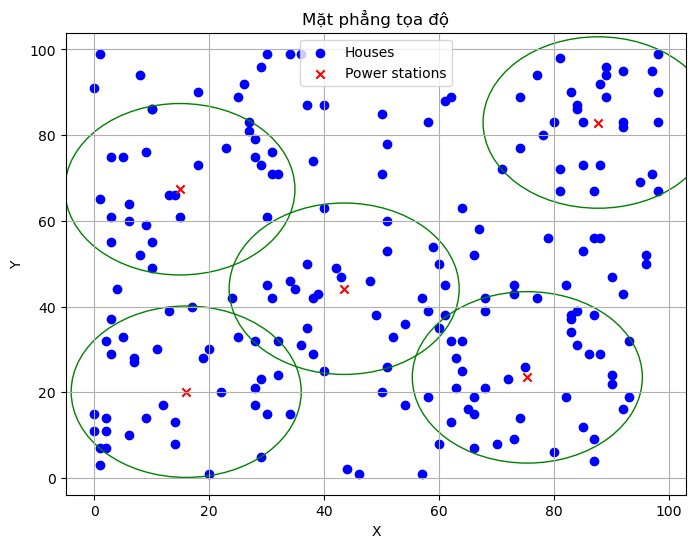

In [385]:
plot_points_and_circles(coordinates, solution[-1][1], L)

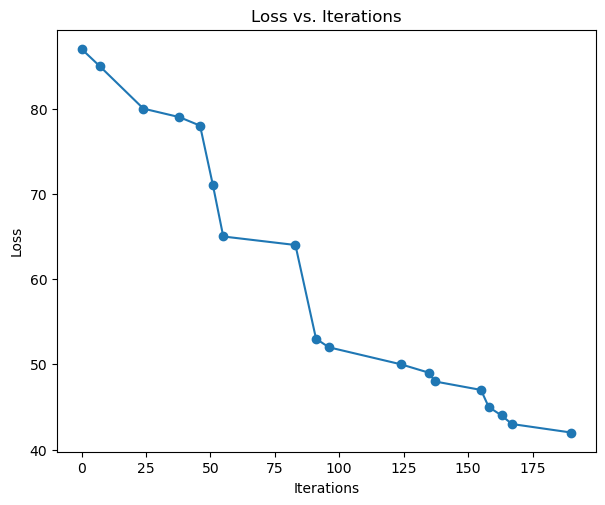

In [386]:
indexes = [s[0] for s in solution]
losses = [s[2] for s in solution]

plt.figure(figsize=(6.95, 5.48))
plt.plot(indexes, losses, marker='o')

# Đặt tên cho trục x và trục y
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Đặt tiêu đề cho đồ thị
plt.title('Loss vs. Iterations')

# Hiển thị đồ thị
plt.show()